[Reference](https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3)

--- Index of Outliers ----
(array([24, 35, 67, 81]),)
--- Observations found as outlier -----
[[115.  79.]
 [135.  84.]
 [122.  89.]
 [168.  81.]]


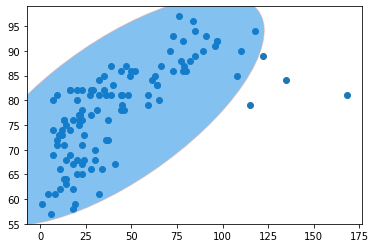

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

# Import dataset and clean it
df= pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/airquality.csv', sep=",", decimal='.' )
df.head()

df = df[['Ozone', 'Temp']]
df = df.dropna()
df = df.to_numpy()

# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

# Distances between center point and 
distances = []
for i, val in enumerate(df):
      p1 = val
      p2 = centerpoint
      distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
      distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.95, df.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index of Outliers ----')
print(outlierIndexes)
# array([24, 35, 67, 81])

print('--- Observations found as outlier -----')
print(df[ distances > cutoff , :])

## Finding ellipse dimensions 
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()